# Test file

This notebook is used to better understand the dataset and how to use it. It is not intended to be used for training the model. Specifically, we are also testing the use of our preprocessing functions.

Data processing was partially inspired by [this](https://www.digitalocean.com/community/tutorials/how-to-build-a-neural-network-to-translate-sign-language-into-english) tutorial.

## Imports

In [1]:
from torch.utils.data import Dataset
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import pandas as pd

from visualisation_utils import plot_images, plot_image
from preprocessing_utils import ASLDataset, get_train_test_dataloader
from training_utils import NeuralNet, train

## Data visualisation

In [2]:
data = pd.read_csv('data/sign_mnist_train.csv')
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


<AxesSubplot:xlabel='label', ylabel='count'>

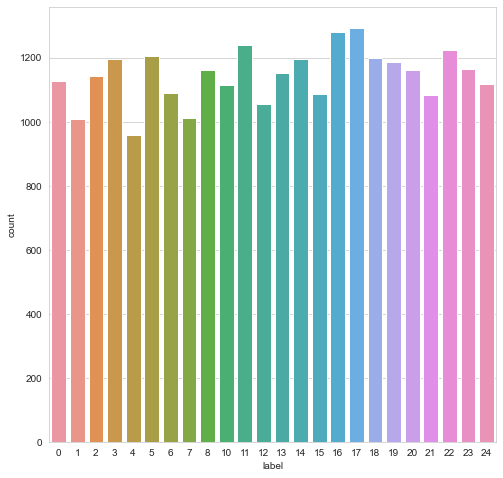

In [8]:
# making a countplot of the labels
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.countplot(x = 'label', data = data)

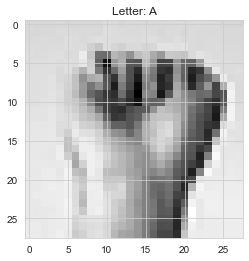

In [4]:
plot_image('a', data)

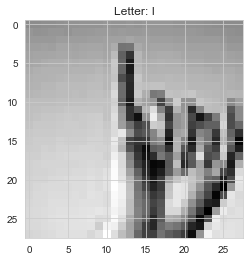

In [9]:
plot_image('i', data)

In [10]:
plot_image('z', data)

letter z not found


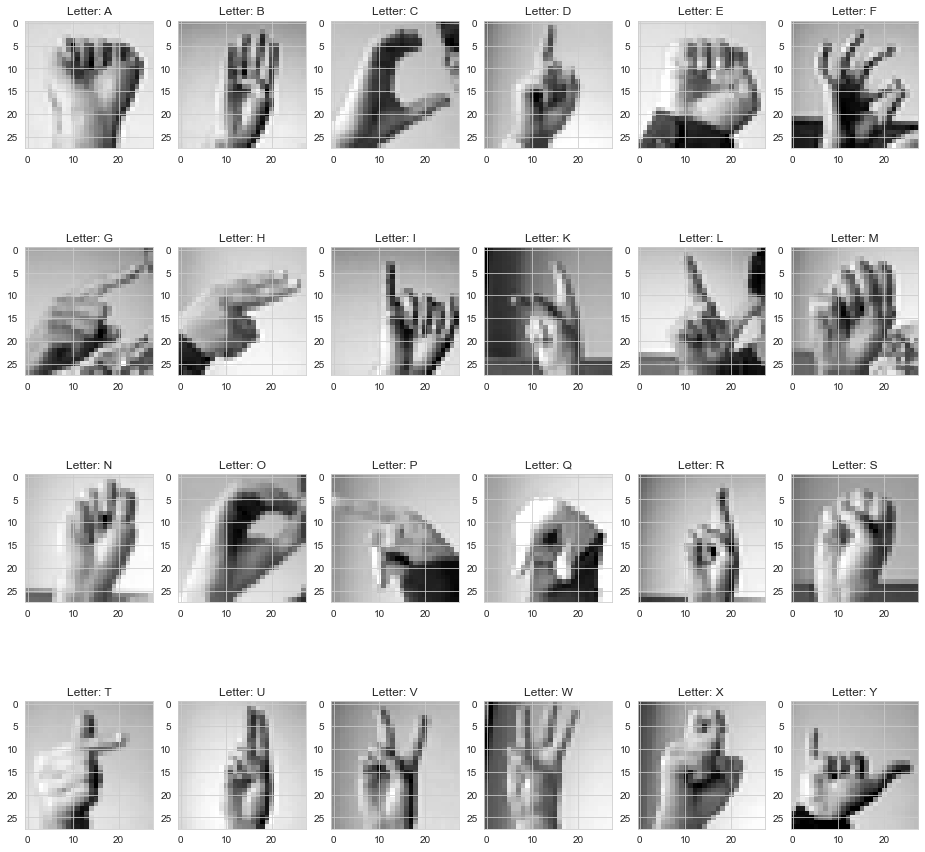

In [11]:
plot_images(data)

## Testing the Dataset class

In [2]:
train_path = 'data/sign_mnist_train.csv'
test_path = 'data/sign_mnist_test.csv'
train_loader, test_loader = get_train_test_dataloader(train_path, test_path)

In [13]:
print(next(iter(train_loader)))

{'image': tensor([[[[-3.2555, -3.2553, -3.2550,  ..., -3.2527, -3.2576, -3.2536],
          [-3.2551, -3.2548, -3.2544,  ..., -3.2535, -3.2574, -3.2527],
          [-3.2547, -3.2543, -3.2540,  ..., -3.2540, -3.2519, -3.2523],
          ...,
          [-3.2662, -3.2662, -3.2544,  ..., -3.2662, -3.2662, -3.2662],
          [-3.2662, -3.2662, -3.2597,  ..., -3.2662, -3.2662, -3.2662],
          [-3.2662, -3.2662, -3.2587,  ..., -3.2662, -3.2662, -3.2662]]],


        [[[-3.2527, -3.2525, -3.2523,  ..., -3.2511, -3.2511, -3.2510],
          [-3.2527, -3.2524, -3.2522,  ..., -3.2509, -3.2509, -3.2508],
          [-3.2525, -3.2523, -3.2520,  ..., -3.2508, -3.2507, -3.2506],
          ...,
          [-3.2504, -3.2501, -3.2499,  ..., -3.2482, -3.2482, -3.2482],
          [-3.2503, -3.2502, -3.2500,  ..., -3.2483, -3.2482, -3.2483],
          [-3.2503, -3.2501, -3.2500,  ..., -3.2482, -3.2482, -3.2482]]],


        [[[-3.2662, -3.2662, -3.2614,  ..., -3.2662, -3.2662, -3.2662],
          [-3.26

## Testing the training function

let's try to train the model on 10% of the data and see how it goes

In [3]:
from torchvision import models
from torchsummary import summary

In [4]:
# print the model summary
model = NeuralNet()
vgg16 = models.vgg16(pretrained=True)
summary(model, (1, 28, 28))

/usr/local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/aarohigupta/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:19<00:00, 27.8MB/s] 


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]             640
            Conv2d-2          [-1, 128, 28, 28]          73,856
            Conv2d-3          [-1, 256, 28, 28]         295,168
            Conv2d-4          [-1, 512, 28, 28]       1,180,160
            Conv2d-5          [-1, 512, 28, 28]       2,359,808
         MaxPool2d-6            [-1, 512, 7, 7]               0
            Linear-7                 [-1, 4096]     102,764,544
            Linear-8                 [-1, 4096]      16,781,312
            Linear-9                   [-1, 24]          98,328
Total params: 123,553,816
Trainable params: 123,553,816
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 9.06
Params size (MB): 471.32
Estimated Total Size (MB): 480.38
-------------------------------

In [5]:
summary(vgg16, (1, 28, 28))

RuntimeError: Given groups=1, weight of size [64, 3, 3, 3], expected input[2, 1, 28, 28] to have 3 channels, but got 1 channels instead

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

In [7]:
# define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# define the loss function
criterion = nn.CrossEntropyLoss()

# define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# define the learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


In [8]:
# get a sample of the training data
dataiter = iter(train_loader)
sample = next(dataiter)
images, labels = sample['image'], sample['label']

# get the class probabilities
ps = torch.exp(model(images))

# make sure the shape is appropriate, we should get 25 x 24
print(ps.shape)

# make sure we get the expected probabilities
print(ps.sum(dim=1))

AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute 'next'

In [9]:
# define the number of epochs to train for
num_epochs = 2

# train the model
model = train(model, train_loader, criterion, optimizer, scheduler, num_epochs, device)

epoch: 0, batch: 0, loss: 3.1769986152648926
epoch: 0, batch: 100, loss: 200503.015428248
